In [1]:
import pandas, numpy, qnorm

In [2]:
import scipy, scipy.signal
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'xtick.labelsize':20, 
                            'ytick.labelsize':20, 
                            'axes.labelsize':20, 
                            'figure.figsize':(12 * 0.90, 9 * 0.90)})

# user-defined variables

In [4]:
input_dir = '/Users/adrian/research/vigur/data/metabolomics/targeted/'

basic_input_file = 'EC008_ROSA_PMVEC_INTRA_BASIC.xlsx'
positive_input_file = 'EC008_ROSA_PMVEC_INTRA_POS.xlsx'
negative_input_file = 'EC008_ROSA_PMVEC_INTRA_NEG.xlsx'

input_files = [positive_input_file, negative_input_file, basic_input_file]
labels = ['positive', 'negative', 'basic']

# read metadata

In [5]:
path = input_dir + basic_input_file
metadata = pandas.read_excel(input_dir+basic_input_file, sheet_name=0, index_col=1)
metadata.head()

,Sample,Sample ID,BioReplicate,Timepoint,µM catech,TecRep,TNFalpha,LPS,cell number,LCMS Method,LCMS Analytical Order,LCMS BATCH
Label,,,,,,,,,,,,
Pool1_rab_neg,PMUEC_INTRA_EC008_250,-,-,-,-,-,-,-,-,HILIC_RAB_BASIC_20min,1,1
Pool1_rab_neg,PMUEC_INTRA_EC008_251,-,-,-,-,-,-,-,-,HILIC_RAB_BASIC_20min,2,1
Pool1_rab_neg,PMUEC_INTRA_EC008_252,-,-,-,-,-,-,-,-,HILIC_RAB_BASIC_20min,3,1
Pool2_rab_neg,PMUEC_INTRA_EC008_254,-,-,-,-,-,-,-,-,HILIC_RAB_BASIC_20min,4,1
A313,PMUEC_INTRA_EC008_256,A313,4,4,4,2,0,0,300000,HILIC_RAB_BASIC_20min,5,1


In [6]:
new_labels = [element.split('_')[0] for element in metadata.index.values]
rosetta = dict(zip(metadata.index.values, new_labels))
metadata.rename(index=rosetta, inplace=True)
metadata

,Sample,Sample ID,BioReplicate,Timepoint,µM catech,TecRep,TNFalpha,LPS,cell number,LCMS Method,LCMS Analytical Order,LCMS BATCH
Label,,,,,,,,,,,,
Pool1,PMUEC_INTRA_EC008_250,-,-,-,-,-,-,-,-,HILIC_RAB_BASIC_20min,1,1
Pool1,PMUEC_INTRA_EC008_251,-,-,-,-,-,-,-,-,HILIC_RAB_BASIC_20min,2,1
Pool1,PMUEC_INTRA_EC008_252,-,-,-,-,-,-,-,-,HILIC_RAB_BASIC_20min,3,1
Pool2,PMUEC_INTRA_EC008_254,-,-,-,-,-,-,-,-,HILIC_RAB_BASIC_20min,4,1
A313,PMUEC_INTRA_EC008_256,A313,4,4,4,2,0,0,300000,HILIC_RAB_BASIC_20min,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
008-19,PMUEC_INTRA_EC008_341,008-19,2,4,4,1,0,0,38000,HILIC_RAB_BASIC_20min,33,2
008-26,PMUEC_INTRA_EC008_342,008-26,2,24,24,2,0,0,38000,HILIC_RAB_BASIC_20min,34,2
008-13,PMUEC_INTRA_EC008_343,008-13,1,24,24,1,0,0,74000,HILIC_RAB_BASIC_20min,35,2


# broadly exploring distributions

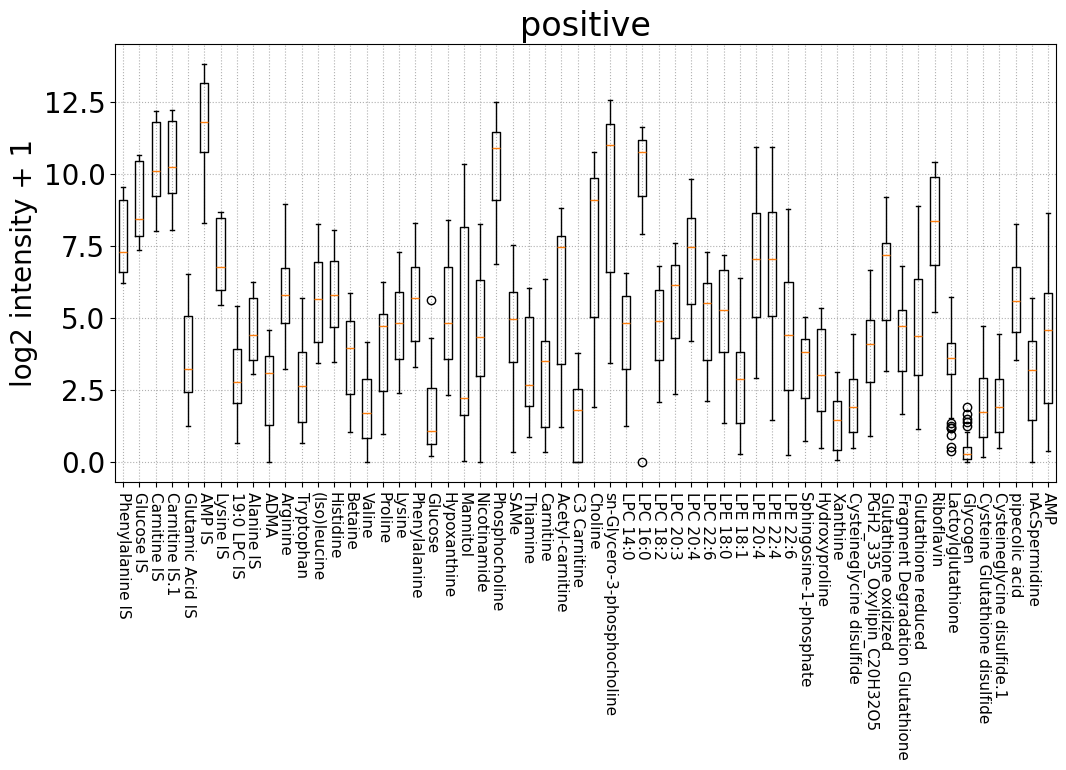

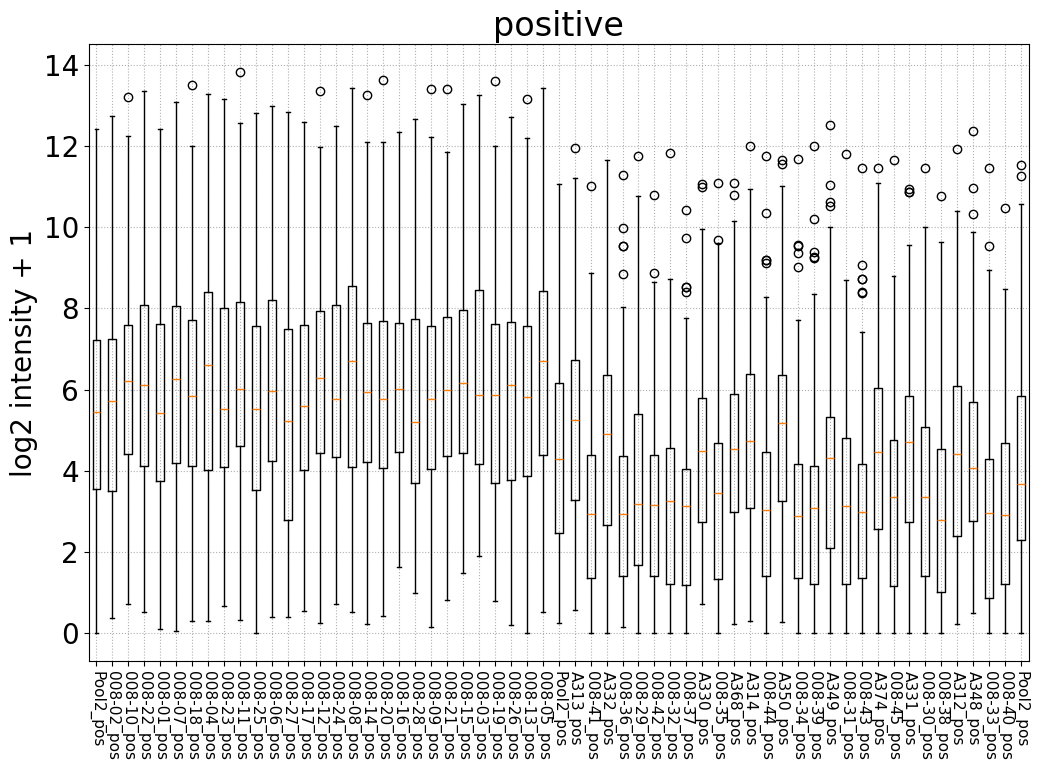

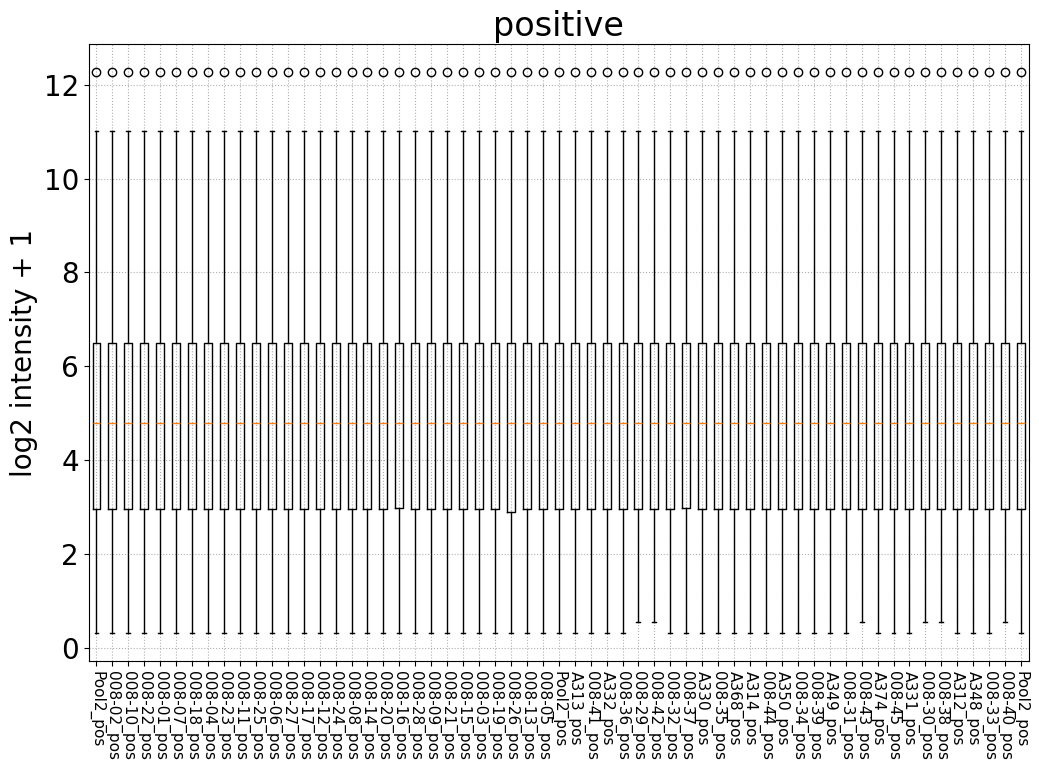

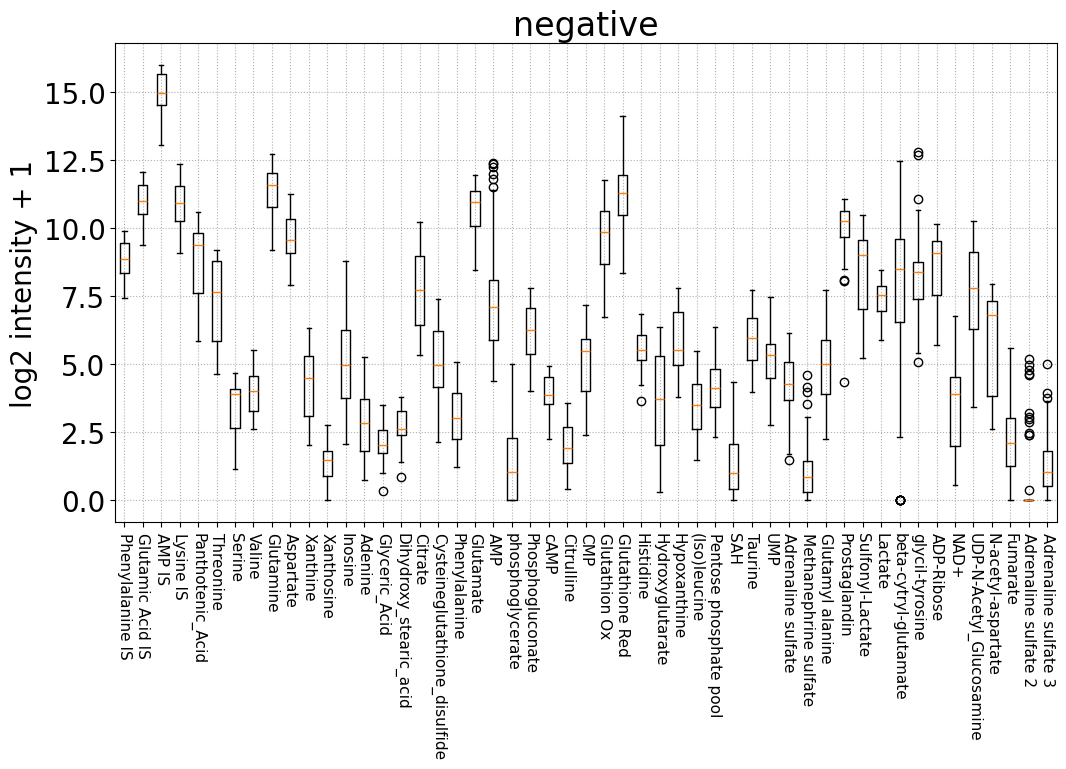

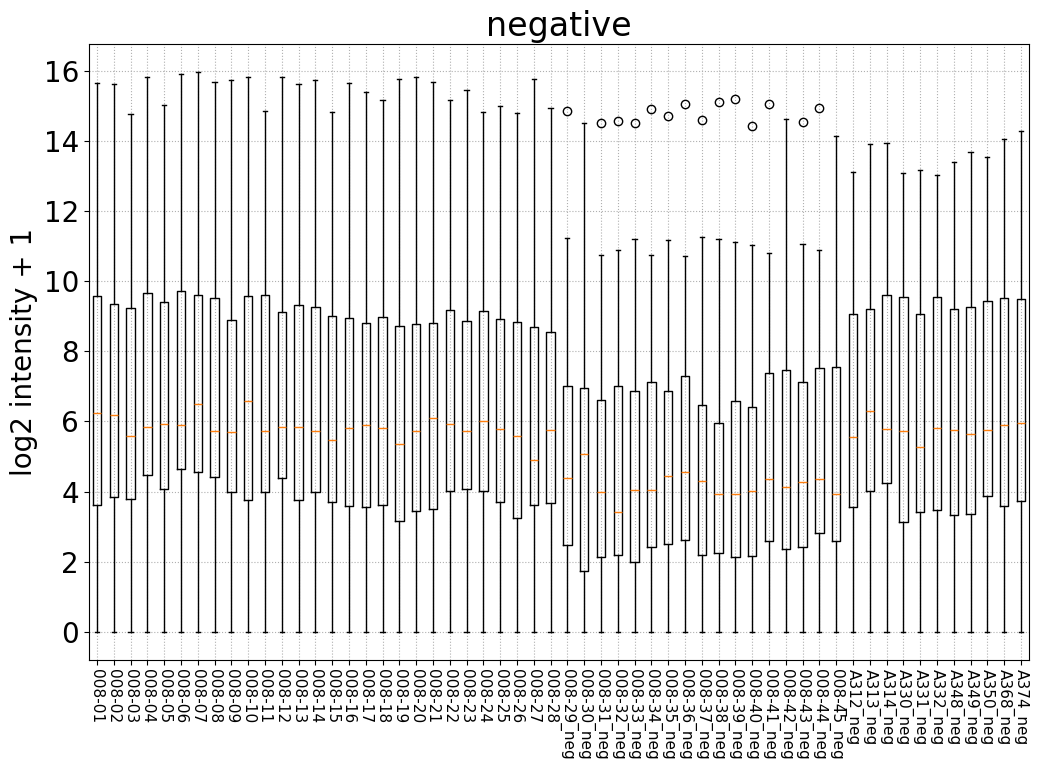

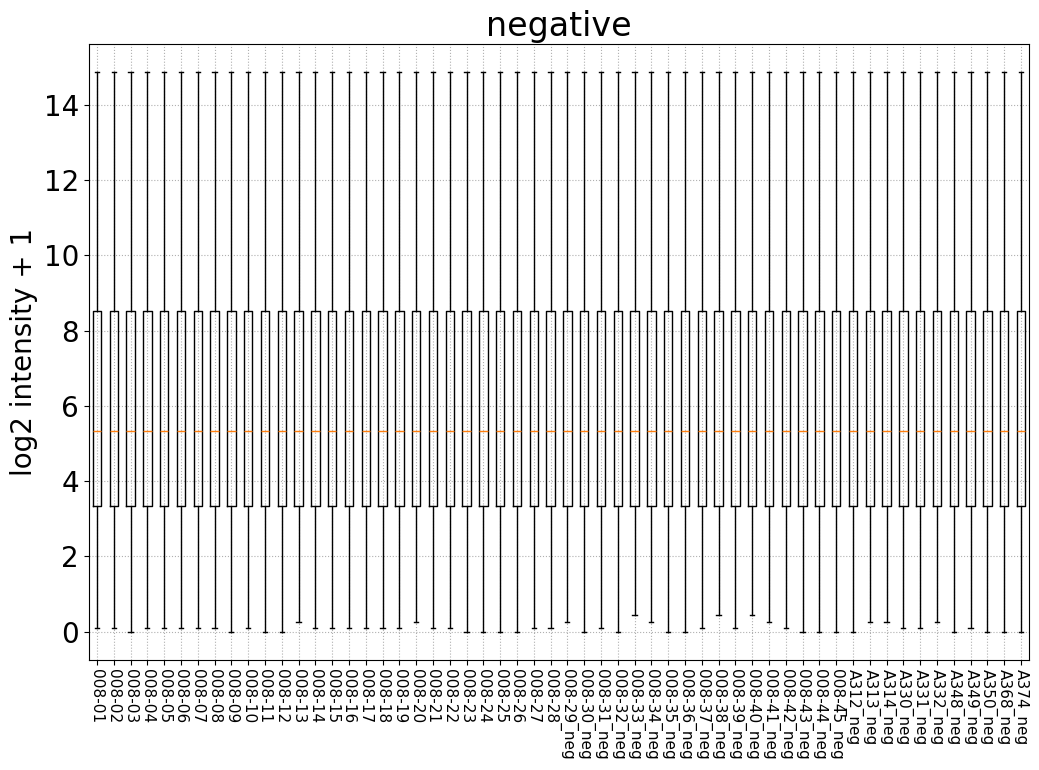

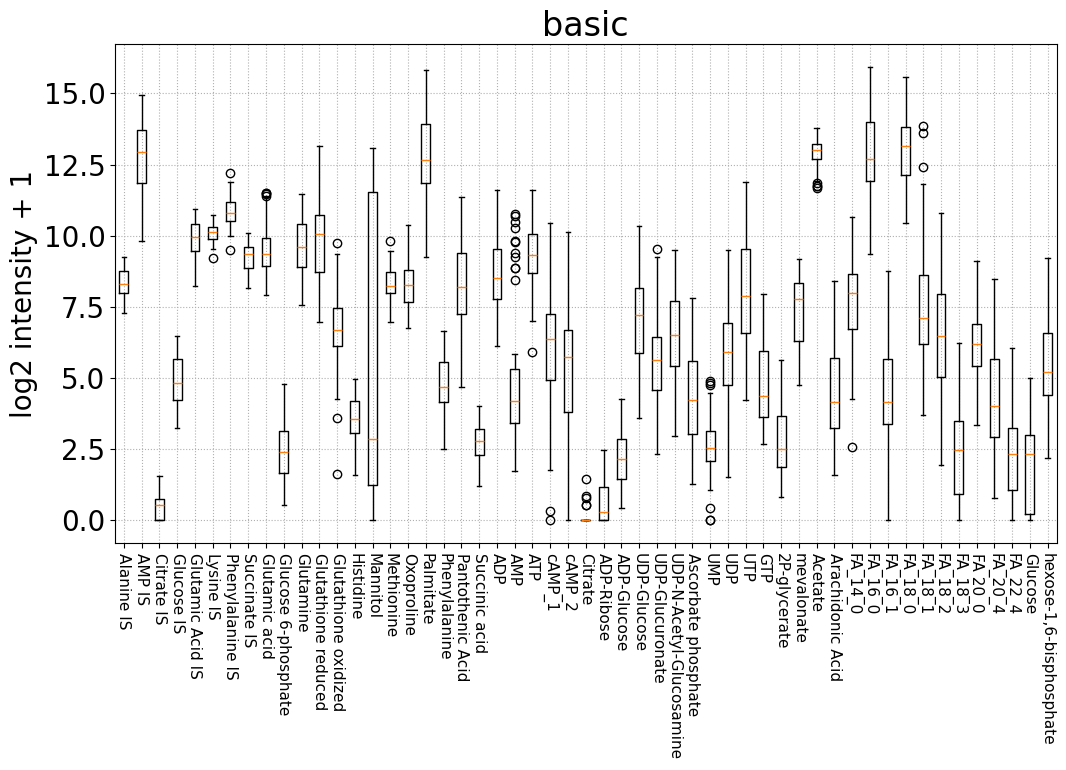

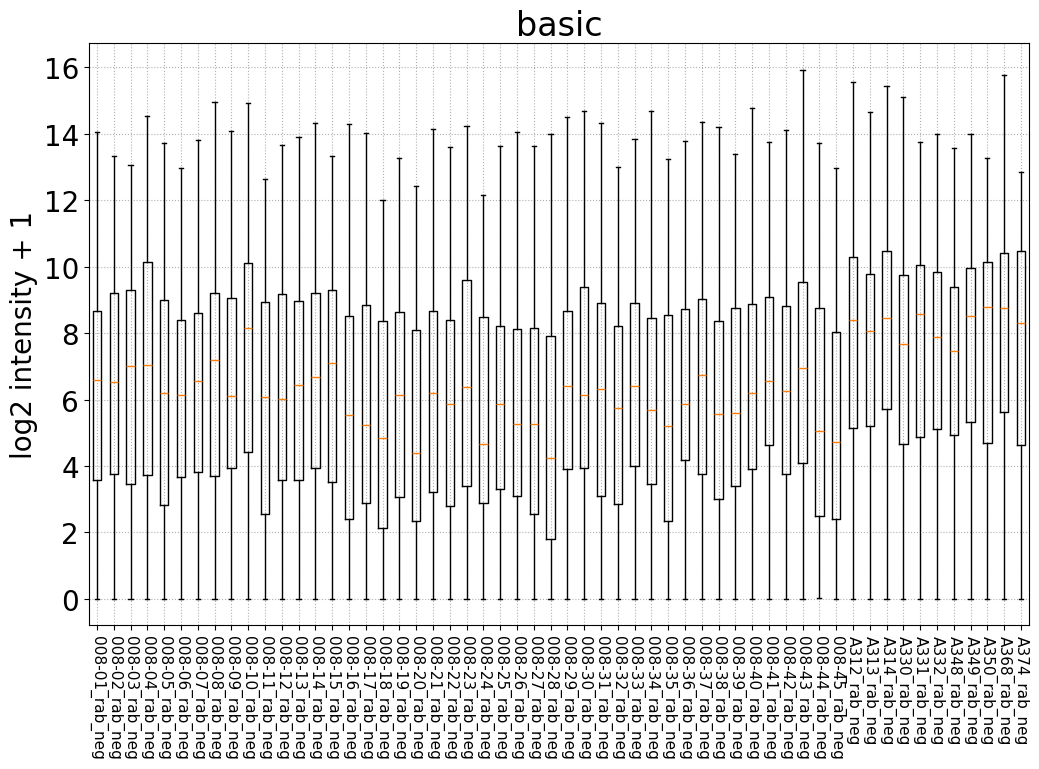

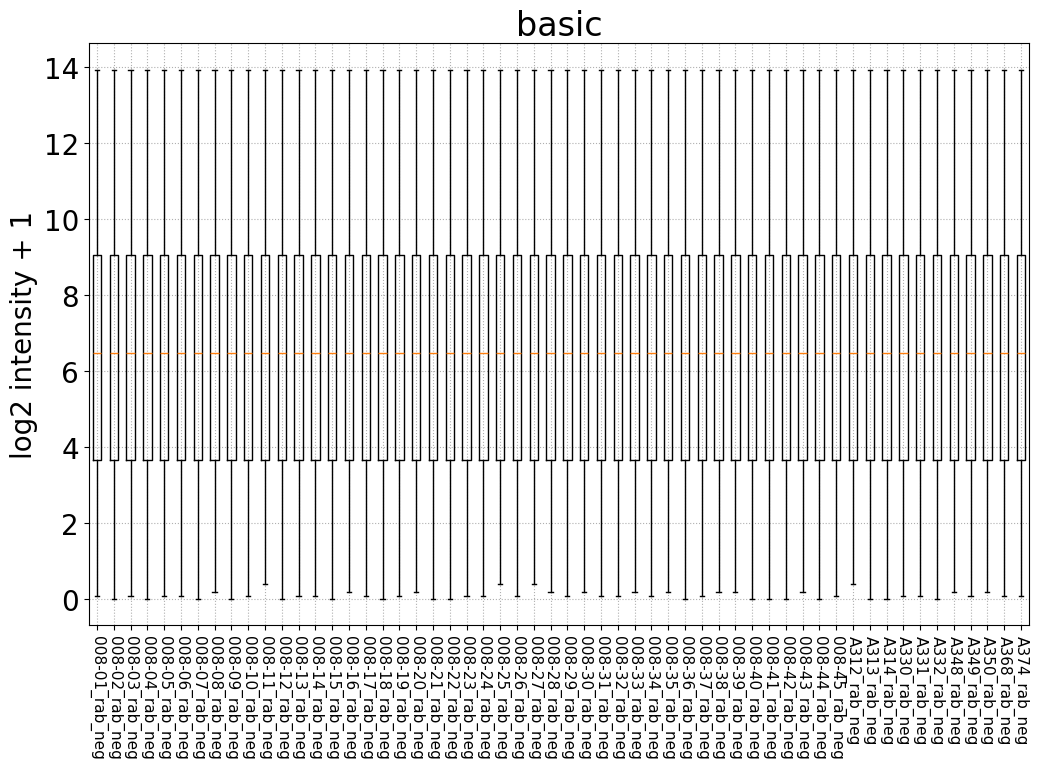

In [7]:
all_dfs = []
for i in range(len(input_files)):

    input_file = input_files[i]
    label = labels[i]
    
    path = input_dir + input_file
    df = pandas.read_excel(path, sheet_name=1, index_col=0)
    
    log2intensity = numpy.log2(df+1)

    #
    # display metabolite distributions
    #
    matplotlib.pyplot.boxplot(log2intensity)

    matplotlib.pyplot.xticks(range(1,len(df.columns)+1), df.columns, rotation=-90, fontsize=11)
    matplotlib.pyplot.ylabel('log2 intensity + 1')

    matplotlib.pyplot.title(label)
    matplotlib.pyplot.grid(ls=':')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

    #
    # show sample distributions
    #
    log_df = numpy.log2(df+1)
    transpose = log2intensity.transpose()

    matplotlib.pyplot.boxplot(transpose)
    matplotlib.pyplot.xticks(range(1,len(transpose.columns)+1), transpose.columns, rotation=-90, fontsize=11)
    matplotlib.pyplot.ylabel('log2 intensity + 1')
    matplotlib.pyplot.title(label)
    matplotlib.pyplot.grid(ls=':')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

    #
    # perform quantile normalization
    #
    qndf = qnorm.quantile_normalize(transpose, axis=1)

    matplotlib.pyplot.boxplot(qndf)
    matplotlib.pyplot.xticks(range(1,len(qndf.columns)+1), qndf.columns, rotation=-90, fontsize=11)
    matplotlib.pyplot.ylabel('log2 intensity + 1')
    matplotlib.pyplot.title(label)
    matplotlib.pyplot.grid(ls=':')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

    all_dfs.append(qndf)

The conclusion from these figures is that:
- quantification units are intensities.
- quantification is not quantitative.
- we need quantile normalization.

# visualize PCA of samples

## fix df indexes to map metadata

In [8]:
for df in all_dfs:
    new_labels = [element.split('_')[0] for element in df.columns.values]
    rosetta = dict(zip(df.columns.values, new_labels))
    df.rename(columns=rosetta, inplace=True)  

In [9]:
metadata.index

Index(['Pool1', 'Pool1', 'Pool1', 'Pool2', 'A313', '008-41', 'A332', '008-36',
       '008-29', '008-42', 'Pool2', '008-32', '008-37', 'A330', '008-35',
       'A368', 'A314', 'Pool2', '008-44', 'A350', '008-34', '008-39', 'A349',
       '008-31', 'Pool2', '008-43', 'A374', '008-45', 'A331', '008-30',
       'Pool2', '008-38', 'A312', 'A348', '008-33', '008-40', 'Pool2', 'Pool1',
       'Pool1', 'Pool1', 'Pool2', '008-02', '008-10', '008-22', '008-01',
       '008-07', '008-18', 'Pool2', '008-04', '008-23', '008-11', '008-25',
       '008-06', '008-27', 'Pool2', '008-17', '008-12', '008-24', '008-08',
       '008-14', 'Pool2', '008-20', '008-16', '008-28', '008-09', '008-21',
       '008-15', 'Pool2', '008-03', '008-19', '008-26', '008-13', '008-05',
       'Pool2'],
      dtype='object', name='Label')

[0.25535018 0.16293659]
0 008-01
1 008-02
2 008-03
3 008-04
4 008-05
5 008-06
6 008-07
7 008-08
8 008-09
9 008-10
10 008-11
11 008-12
12 008-13
13 008-14
14 008-15
15 008-16
16 008-17
17 008-18
18 008-19
19 008-20
20 008-21
21 008-22
22 008-23
23 008-24
24 008-25
25 008-26
26 008-27
27 008-28
28 008-29
29 008-30
30 008-31
31 008-32
32 008-33
33 008-34
34 008-35
35 008-36
36 008-37
37 008-38
38 008-39
39 008-40
40 008-41
41 008-42
42 008-43
43 008-44
44 008-45
45 A312
46 A313
47 A314
48 A330
49 A331
50 A332
51 A348
52 A349
53 A350
54 A368
55 A374


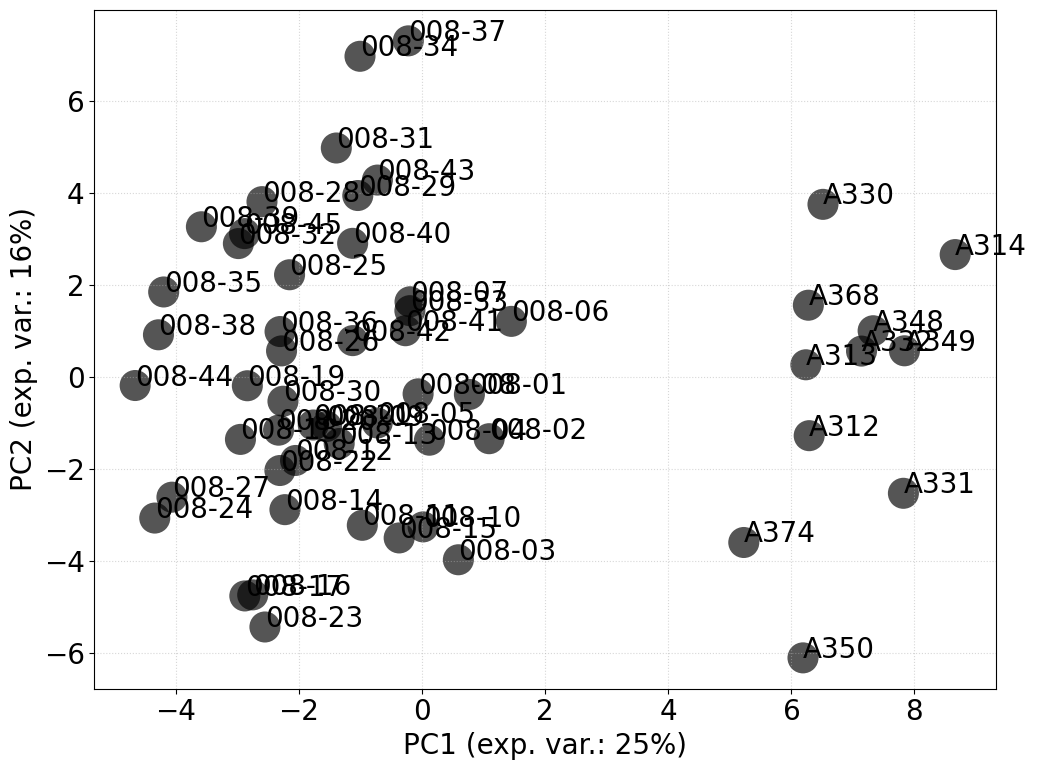

In [10]:
wdf = qndf.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(wdf)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

for i in range(len(locations)):
    label = wdf.index[i]
    print(i, wdf.index[i])
    matplotlib.pyplot.scatter(locations[i, 0], locations[i, 1], s=500, c='black', marker='o', alpha=2/3, edgecolors='none')
    matplotlib.pyplot.text(locations[i, 0], locations[i, 1], label)

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [11]:
# pca on samples
# subset specific samples for heatmap
# statistical tests for particular conditions
# heatmap of only differential variables, one heatmap for lipids, another for metabolites